In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
%matplotlib inline
from fbprophet import Prophet
plt.style.use('fivethirtyeight')
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [26]:
data = pd.read_csv('avocado.csv', encoding='utf-8') 

Let us first take a brief view of our data

In [27]:
data.head(2  )

Unnamed: 0        Date  AveragePrice  Total Volume     4046      4225  \
0           0  2015-12-27          1.33      64236.62  1036.74  54454.85   
1           1  2015-12-20          1.35      54876.98   674.28  44638.81   

    4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0  48.16     8696.87     8603.62       93.25          0.0  conventional  2015   
1  58.33     9505.56     9408.07       97.49          0.0  conventional  2015   

   region  
0  Albany  
1  Albany

In [28]:
print ("There are " + str(data.shape[0]) + " data points . The number of columns is: " + str(data.shape[1]) )

There are 18249 data points . The number of columns is: 14


In [29]:
print(data.columns.tolist())

['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']


We can definitely remove Column Unnamed: 0. The rest of the columns are in accordance with the description.'Small Bags', 'Large Bags', 'XLarge Bags' ,are there to represnt the quantity of each bag size a the observ ation date.

In [30]:
data_1 = data.copy(deep=True)

In [31]:
data_1=data_1.drop(['Unnamed: 0'], axis=1)

Currently we have13 columns. Let us check the unique values at each column.

In [32]:
column_names=data_1.columns.tolist()

In [33]:
for col_name in column_names:
    print ("In column: " + str(col_name)+ " - there are "+ str(data_1[col_name].unique().shape[0]) +" unique values")

In column: Date - there are 169 unique values
In column: AveragePrice - there are 259 unique values
In column: Total Volume - there are 18237 unique values
In column: 4046 - there are 17702 unique values
In column: 4225 - there are 18103 unique values
In column: 4770 - there are 12071 unique values
In column: Total Bags - there are 18097 unique values
In column: Small Bags - there are 17321 unique values
In column: Large Bags - there are 15082 unique values
In column: XLarge Bags - there are 5588 unique values
In column: type - there are 2 unique values
In column: year - there are 4 unique values
In column: region - there are 54 unique values


Let us check if there are any missing values in our data

In [34]:
data_1.isnull().any().any()

False

Check for duplicated rows

In [35]:
data_1["is_duplicate"]= data_1.duplicated()
data_1[data_1["is_duplicate"]==True]

Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region, is_duplicate]
Index: []

No duplicated data points

In [36]:
data_1=data_1.drop(["is_duplicate"], axis=1)

Check if at the year column the year corresponds to that at the date column , eventually we won't need the year column.

In [37]:
for i in range (data_1.shape[0]):
    if(data_1['Date'][i][:4]!=str(data_1['year'][i])):
        print(i)
print("The year data is in correspondance")  

The year data is in correspondance


In [38]:
data_1['Date/Time']=pd.to_datetime(data_1['Date'], format="%Y/%m/%d")

Let us check the region variable and see what values does it contain

In [39]:
regions=data['region'].unique().tolist()
len(regions)

54

The region variable contains states and cities both, let's a ssign a state to each city and aftrewards try to group the states.

In [40]:
data_1['State']=''

In [41]:
ind=data_1[data_1['region']=='HartfordSpringfield'].index.tolist()
data_1.loc[ind, 'State'] = 'Connecticut'

ind=data_1[data_1['region']=='Albany'].index.tolist()
data_1.loc[ind, 'State'] = 'NY'

ind=data_1[data_1['region']=='Atlanta'].index.tolist()
data_1.loc[ind, 'State'] = 'Georgia'

ind=data_1[data_1['region']=='BaltimoreWashington'].index.tolist()
data_1.loc[ind, 'State'] = 'Maryland'

ind=data_1[data_1['region']=='Boise'].index.tolist()
data_1.loc[ind, 'State'] = 'Idaho'

ind=data_1[data_1['region']=='Boston'].index.tolist()
data_1.loc[ind, 'State'] = 'Massachusetts'

ind=data_1[data_1['region']=='BuffaloRochester'].index.tolist()
data_1.loc[ind, 'State'] = 'NY'

ind=data_1[data_1['region']=='California'].index.tolist()
data_1.loc[ind, 'State'] = 'California'

ind=data_1[data_1['region']=='Charlotte'].index.tolist()
data_1.loc[ind, 'State'] = 'NorthCarolina'

ind=data_1[data_1['region']=='Chicago'].index.tolist()
data_1.loc[ind, 'State'] = 'Illinois'

ind=data_1[data_1['region']=='CincinnatiDayton'].index.tolist()
data_1.loc[ind, 'State'] = 'Ohio'

ind=data_1[data_1['region']=='Columbus'].index.tolist()
data_1.loc[ind, 'State'] = 'Ohio'

ind=data_1[data_1['region']=='DallasFtWorth'].index.tolist()
data_1.loc[ind, 'State'] = 'Texas'

ind=data_1[data_1['region']=='Denver'].index.tolist()
data_1.loc[ind, 'State'] = 'Colorado'

ind=data_1[data_1['region']== 'Detroit'].index.tolist()
data_1.loc[ind, 'State'] = 'Michigan'

ind=data_1[data_1['region']== 'GrandRapids'].index.tolist()
data_1.loc[ind, 'State'] = 'Michigan'

ind=data_1[data_1['region']== 'GreatLakes'].index.tolist()
data_1.loc[ind, 'State'] = 'GreatLakes'

ind=data_1[data_1['region']== 'HarrisburgScranton'].index.tolist()
data_1.loc[ind, 'State'] = 'Pennsylvania'

ind=data_1[data_1['region']== 'HarfordSpringfield'].index.tolist()
data_1.loc[ind, 'State'] = 'Alabama'

ind=data_1[data_1['region']== 'Houston'].index.tolist()
data_1.loc[ind, 'State'] = 'Texas'

ind=data_1[data_1['region']== 'Indianapolis'].index.tolist()
data_1.loc[ind, 'State'] = 'Indiana'

ind=data_1[data_1['region']== 'Jacksonville'].index.tolist()
data_1.loc[ind, 'State'] = 'Florida'

ind=data_1[data_1['region']== 'LasVegas'].index.tolist()
data_1.loc[ind, 'State'] = 'Nevada'

ind=data_1[data_1['region']== 'LosAngeles'].index.tolist()
data_1.loc[ind, 'State'] = 'California'

ind=data_1[data_1['region']== 'Louisville'].index.tolist()
data_1.loc[ind, 'State'] = 'Kentucky'

ind=data_1[data_1['region']== 'MiamiFtLauderdale'].index.tolist()
data_1.loc[ind, 'State'] = 'Florida'

ind=data_1[data_1['region']== 'Midsouth'].index.tolist()
data_1.loc[ind, 'State'] = 'Midsouth'

ind=data_1[data_1['region']==  'Nashville'].index.tolist()
data_1.loc[ind, 'State'] = 'Tennessee'

ind=data_1[data_1['region']==  'NewOrleansMobile'].index.tolist()
data_1.loc[ind, 'State'] = 'Louisiana'

ind=data_1[data_1['region']==  'NewYork'].index.tolist()
data_1.loc[ind, 'State'] = 'NY'

ind=data_1[data_1['region']==  'Northeast'].index.tolist()
data_1.loc[ind, 'State'] = 'Northeast'

ind=data_1[data_1['region']==  'NorthernNewEngland'].index.tolist()
data_1.loc[ind, 'State'] = 'NorthernNewEngland'

ind=data_1[data_1['region']==  'Orlando'].index.tolist()
data_1.loc[ind, 'State'] = 'Florida'

ind=data_1[data_1['region']==  'Philadelphia'].index.tolist()
data_1.loc[ind, 'State'] = 'Pennsylvania'

ind=data_1[data_1['region']==  'PhoenixTucson'].index.tolist()
data_1.loc[ind, 'State'] = 'Arizona'

ind=data_1[data_1['region']==  'Pittsburgh'].index.tolist()
data_1.loc[ind, 'State'] = 'Pennsylvania'

ind=data_1[data_1['region']==  'Plains'].index.tolist()
data_1.loc[ind, 'State'] = 'Plains'

ind=data_1[data_1['region']==  'Portland'].index.tolist()
data_1.loc[ind, 'State'] = 'Oregon'

ind=data_1[data_1['region']==  'RaleighGreensboro'].index.tolist()
data_1.loc[ind, 'State'] = 'NorthCarolina'

ind=data_1[data_1['region']==  'RichmondNorfolk'].index.tolist()
data_1.loc[ind, 'State'] = 'Virginia'

ind=data_1[data_1['region']==  'Roanoke'].index.tolist()
data_1.loc[ind, 'State'] = 'Virginia'

ind=data_1[data_1['region']==  'Sacramento'].index.tolist()
data_1.loc[ind, 'State'] = 'California'

ind=data_1[data_1['region']==  'SanDiego'].index.tolist()
data_1.loc[ind, 'State'] = 'California'

ind=data_1[data_1['region']==  'SanFrancisco'].index.tolist()
data_1.loc[ind, 'State'] = 'California'

ind=data_1[data_1['region']==  'Seattle'].index.tolist()
data_1.loc[ind, 'State'] = 'Washington'

ind=data_1[data_1['region']==  'SouthCarolina'].index.tolist()
data_1.loc[ind, 'State'] = 'SouthCarolina'

ind=data_1[data_1['region']==  'SouthCentral'].index.tolist()
data_1.loc[ind, 'State'] = 'SouthCentral'

ind=data_1[data_1['region']==  'Southeast'].index.tolist()
data_1.loc[ind, 'State'] = 'Southeast'

ind=data_1[data_1['region']==  'Spokane'].index.tolist()
data_1.loc[ind, 'State'] = 'Washington'

ind=data_1[data_1['region']==  'StLouis'].index.tolist()
data_1.loc[ind, 'State'] = 'Florida'

ind=data_1[data_1['region']==  'Syracuse'].index.tolist()
data_1.loc[ind, 'State'] = 'NY'

ind=data_1[data_1['region']==  'Tampa'].index.tolist()
data_1.loc[ind, 'State'] = 'Missouri'

ind=data_1[data_1['region']==  'TotalUS'].index.tolist()
data_1.loc[ind, 'State'] = 'TotalUS'

ind=data_1[data_1['region']==  'West'].index.tolist()
data_1.loc[ind, 'State'] = 'West'

ind=data_1[data_1['region']==  'WestTexNewMexico'].index.tolist()
data_1.loc[ind, 'State'] = 'NewMexico'

Let us take a look how many unique values are in the state column.

In [42]:
states=data_1['State'].unique().tolist()
print('There are '+str(len(states))+ ' states')

There are 36 states


As a next step we will try to make as little groups as possible by these regions.

Let us look for variables that strongly correlate with each other: To make our model more compact and less prone to over-fitting
we would like to include only one of them.    

In [43]:
data_1['Year'], data_1['Month'],  data_1['Day'] = data_1['Date'].str.split('-').str
data_2 = data_1[['Date/Time', 'Date','Year','Month','Day','region','State','AveragePrice','Total Volume','type',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']]

In [282]:
corr_period=data_1.corr()
corr_period

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.093197  
Total Volume    0.963047    0.967238    0.880640     0.747157  0.017193  
4046            0.920057    0.925280    0.838645     0.699377  0.003353  
4225            0.905787    0.916031    0.810015     0.688809 -0.009559  
4770            0.792314    0.802733    0.698471     0.679861 -0.036531  
Total Bags      1.000000    0.994335    0.943009     0.804233  0.071552  
Small Bags      0.994335    1.000000    0.902589     0.806845  0.063915  
Large Bags      0.943009    0.902589    1.000000     0.710858  0.087891  
XLarge Bags     0.804233    0.806845    0.710858     1.000000  0.081033  
year            0.071552    0.063915    0.087891     0.081033  1.000000

The total Volume column has strong correlation with 4046,4225,4770 and total bags. 
To make our model general and less prone to over-fitting let we won't consider the 4 above columns in our predictive model since these features in combination with total volumne have little predictive power. 

In [45]:
data_3 = data_2[['Date/Time', 'Date','Year','Month','Day','region','State','AveragePrice','Total Volume','type',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']]

In [51]:
data_3=data_3.sort_values(by=['Year', 'Month','Day','State']).reset_index()

data_3=data_3.drop(['index'], axis=1)

Let us examine the types: conventional avocado and the organic one. We will start with the general tendency.

In [59]:
data_3['type'].unique().tolist()

['conventional', 'organic']

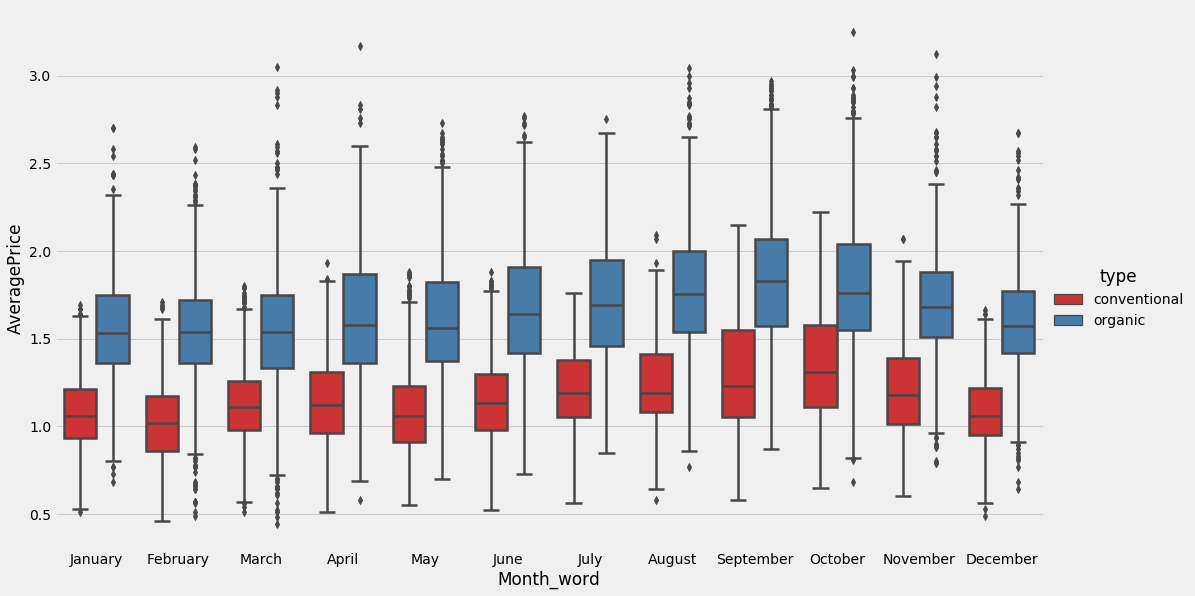

In [60]:
data_3['Month_word'] = data_3['Month'].replace({'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', 
                                   '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', 
                                   '11': 'November', '12': 'December'})

ax = sns.catplot(x="Month_word", y="AveragePrice", hue="type", 
            kind="box", data=data_3, height=8.5, linewidth=2.5, aspect=7/4,palette="Set1");

Let us examine the difference in prices between the conventional and the organic more precisely.

In [66]:
data_3_conventional = data_3[data_3['type']=='conventional']
data_3_organic = data_3[data_3['type']=='organic']

In [71]:
groupBy1_price = data_3_conventional.groupby('Date/Time').mean()
scatter1 = go.Scatter(x=groupBy1_price.AveragePrice.index, y=groupBy1_price.AveragePrice, name="Conventional")

groupBy2_price = data_3_organic.groupby('Date/Time').mean()
scatter2 = go.Scatter(x=groupBy2_price.AveragePrice.index, y=groupBy2_price.AveragePrice, name="Organic")

data = [scatter1, scatter2]
layout=go.Layout(title="Mean Daily Price of Conventional and Organic Avocados", xaxis={'title':'Date'}, yaxis={'title':'Prices'})
fig=go.Figure(data=data,layout=layout)
iplot(fig)

THe Organic avocado price follows almost exactly the price tendency over time of the conventional avocado, 
and is approximately 30% higher than the conventional avocado.


In [72]:
data_4_conventional=data_3_conventional

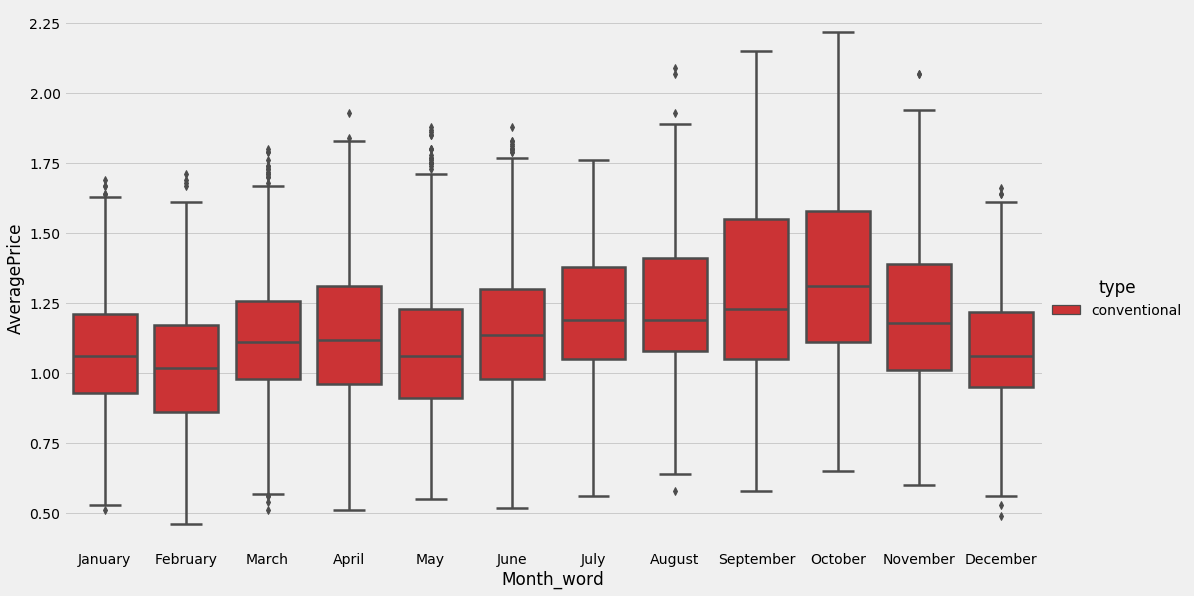

In [76]:
ax = sns.catplot(x="Month_word", y="AveragePrice", hue="type", 
            kind="box", data=data_4_conventional, height=8.5, linewidth=2.5, aspect=7/4,palette="Set1");

The price tendency during the year is as follows: Stable/low prices january-June, increase July-October, decrease Nov.-Dec., 
During the price increase period usually, the prices tend to be higher than average ( larger box part at the upper quartile).    

In [77]:
print('Organic data point:' + str(data_3[data_3['type']=='organic'].shape[0]))
print('Conventional data point:' +str(data_3[data_3['type']=='conventional'].shape[0]))

Organic data point:9123
Conventional data point:9126


we have almost identical number of organic and conventional data points.

The average price difference by year:

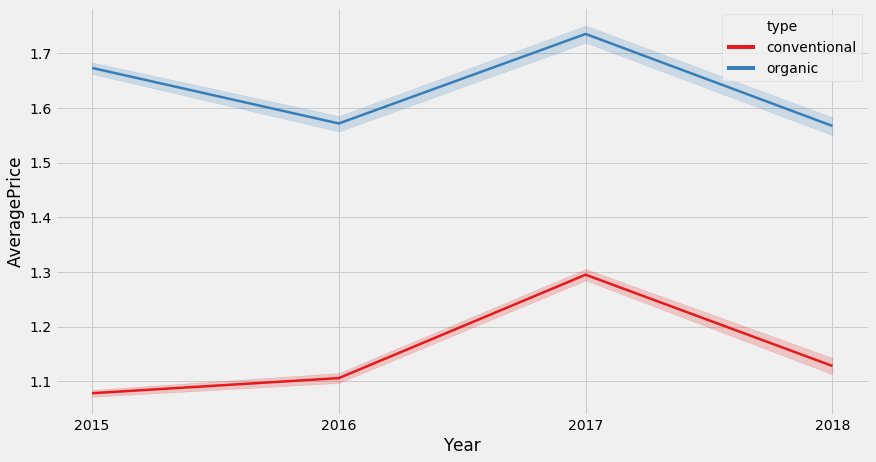

In [78]:
plt.figure(figsize=(13,7))
sns.lineplot(x="Year", y="AveragePrice", hue='type',linewidth=2.5,  data=data_1,palette="Set1")
plt.show()

In [79]:
Type_conv=data_3_conventional.groupby('Year')['AveragePrice'].agg('sum')
Type_org=data_3_organic.groupby('Year')['AveragePrice'].agg('sum')

print(Type_conv)
print(Type_org)
l=['2015','2016','2017','2018']
for val in l:
    print("Conventional avocado records in "+ val +" "+str(data_3[(data_3.type=='conventional')&(data_3.Year==val)].shape[0]))
    print("Organic avocado records in "+ val+" "+str(data_3[(data_3.type=='organic')&(data_3.Year==val)].shape[0]))
    print("")

Year
2015    3026.92
2016    3104.51
2017    3705.97
2018     730.87
Name: AveragePrice, dtype: float64
Year
2015    4697.02
2016    4413.29
2017    4963.59
2018    1015.53
Name: AveragePrice, dtype: float64
Conventional avocado records in 2015 2808
Organic avocado records in 2015 2807

Conventional avocado records in 2016 2808
Organic avocado records in 2016 2808

Conventional avocado records in 2017 2862
Organic avocado records in 2017 2860

Conventional avocado records in 2018 648
Organic avocado records in 2018 648



In [295]:
print("At 2015 the conventional avocado was by " + str (100*(1-(3026.92/2808)/(4697.02/2807))) +"% cheaper than organic")
print("At 2016 the conventional avocado was by " + str (100*(1-(3104.51/2808)/(4413.29/2808))) +"% cheaper than organic")
print("At 2017 the conventional avocado was by " + str (100*(1-(3705.97/2862)/(4963.59/2860))) +"% cheaper than organic")
print("At 2018 the conventional avocado was by " + str (100*(1-(730.87/648)/(1015.53/648))) +"% cheaper than organic")

At 2015 the conventional avocado was by 35.57953687578429% cheaper than organic
At 2016 the conventional avocado was by 29.655427130326807% cheaper than organic
At 2017 the conventional avocado was by 25.389078799420474% cheaper than organic
At 2018 the conventional avocado was by 28.030683485470643% cheaper than organic


So practicaly we can make our predictions for conventional avocado only under fair assumption that the organic 
avocado is going to follows the price tendency during the year with the difference of ~ 25%. 
Alos we suspect that the difference between the average prices of conventional avocado and the organic drops every year, but we have too little year data point to be sure that this assumption is correct. Folowing the tendency ,we can predict that at least for 2018 this assumption will hold true. So from now on, our dataset would be that of conventional avocado.

In [87]:
# If the organic type contains the same  state values as conventional type
print(data_3_organic['State'].unique().tolist()==data_3_conventional['State'].unique().tolist())

True


Finally, let us start with the partition to different regions. We would like to try the conventional partition.
But first let us examine how the prices differ within the same state.

In [88]:
data_3_conventional_california=data_3_conventional[data_3_conventional['State']=='California']
data_3_conventional_california['region'].unique()

array(['California', 'LosAngeles', 'Sacramento', 'SanDiego',
       'SanFrancisco'], dtype=object)

In [89]:
data_3_conventional_california=data_3_conventional[data_3_conventional['region']=='California']
data_3_conventional_LosAngeles=data_3_conventional[data_3_conventional['region']=='LosAngeles']
data_3_conventional_Sacramento=data_3_conventional[data_3_conventional['region']=='Sacramento']
data_3_conventional_SanDiego=data_3_conventional[data_3_conventional['region']=='SanDiego']
data_3_conventional_SanFrancisco=data_3_conventional[data_3_conventional['region']=='SanFrancisco']

In [90]:
groupBy3_price = data_3_conventional_california.groupby('Date').mean()
scatter3 = go.Scatter(x=groupBy3_price.AveragePrice.index, y=groupBy3_price.AveragePrice, name="california")

groupBy4_price = data_3_conventional_LosAngeles.groupby('Date').mean()
scatter4 = go.Scatter(x=groupBy4_price.AveragePrice.index, y=groupBy4_price.AveragePrice, name="LosAngeles")

groupBy5_price = data_3_conventional_Sacramento.groupby('Date').mean()
scatter5 = go.Scatter(x=groupBy5_price.AveragePrice.index, y=groupBy5_price.AveragePrice, name="Sacramento")

groupBy6_price = data_3_conventional_SanDiego.groupby('Date').mean()
scatter6 = go.Scatter(x=groupBy6_price.AveragePrice.index, y=groupBy6_price.AveragePrice, name="SanDiego")

groupBy7_price = data_3_conventional_SanFrancisco.groupby('Date').mean()
scatter7 = go.Scatter(x=groupBy7_price.AveragePrice.index, y=groupBy7_price.AveragePrice, name="SanFrancisc")

data = [#scatter3, 
        scatter4,scatter5, scatter6,scatter7]
layout=go.Layout(title="Mean Daily Price of Conventional Avocados in cities of California", xaxis={'title':'Date'}, yaxis={'title':'Prices'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

We can notice the large price difference between the avocado prices in only the state of California. The highest prices are in SanFrancisco
with the lowest prices in Los Angeles.

In [91]:
data_3_conventional_florida=data_3_conventional[data_3_conventional['State']=='Florida']
data_3_conventional_florida['region'].unique()

array(['Jacksonville', 'MiamiFtLauderdale', 'Orlando', 'StLouis'],
      dtype=object)

In [92]:
data_3_conventional_Jacksonville=data_3_conventional[data_3_conventional['region']=='Jacksonville']
data_3_conventional_MiamiFtLauderdale=data_3_conventional[data_3_conventional['region']=='MiamiFtLauderdale']
data_3_conventional_Orlando=data_3_conventional[data_3_conventional['region']=='Orlando']
data_3_conventional_StLouis=data_3_conventional[data_3_conventional['region']=='StLouis']

In [101]:
groupBy8_price = data_3_conventional_Jacksonville.groupby('Date').mean()
scatter8 = go.Scatter(x=groupBy8_price.AveragePrice.index, y=groupBy8_price.AveragePrice, name='Jacksonville')

groupBy9_price = data_3_conventional_MiamiFtLauderdale.groupby('Date').mean()
scatter9 = go.Scatter(x=groupBy9_price.AveragePrice.index, y=groupBy9_price.AveragePrice, name='MiamiFtLauderdale')

groupBy11_price = data_3_conventional_Orlando.groupby('Date').mean()
scatter11 = go.Scatter(x=groupBy11_price.AveragePrice.index, y=groupBy11_price.AveragePrice, name='Orlando')

groupBy12_price = data_3_conventional_StLouis.groupby('Date').mean()
scatter12 = go.Scatter(x=groupBy12_price.AveragePrice.index, y=groupBy12_price.AveragePrice, name='StLouis')

data = [scatter8, scatter9,scatter11, scatter12]
layout=go.Layout(title="Mean Daily Price of Conventional Avocados in cities of Florida", xaxis={'title':'Date'}, yaxis={'title':'Prices'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

The price difference between the cities in Florida state is deffinitely smaller than in California.

Let us devide the us states in 5 regions: West, SouthEast, South, North, and Midwest

In [102]:
conv_west=data_3_conventional[(data_3_conventional['State']=='California')|
                                             (data_3_conventional['State']=='Colorado')|
                                             (data_3_conventional['State']=='Idaho')|
                                             (data_3_conventional['State']=='Nevada')|
                                             (data_3_conventional['State']=='Oregon')|
                                             (data_3_conventional['State']=='Arizona')
                                            ]

In [103]:
conv_California=conv_west[data_3_conventional['State']=='California']
conv_Colorado=conv_west[data_3_conventional['State']=='Colorado']
conv_Idaho=conv_west[data_3_conventional['State']=='Idaho']
conv_Nevada=conv_west[data_3_conventional['State']=='Nevada']
conv_Oregon=conv_west[data_3_conventional['State']=='Oregon']
conv_Arizona=conv_west[data_3_conventional['State']=='Arizona']

groupBy13_price = conv_California.groupby('Date').mean()
scatter13 = go.Scatter(x=groupBy13_price.AveragePrice.index, y=groupBy13_price.AveragePrice, name='California')

groupBy14_price = conv_Colorado.groupby('Date').mean()
scatter14 = go.Scatter(x=groupBy14_price.AveragePrice.index, y=groupBy14_price.AveragePrice, name='Colorado')

groupBy15_price = conv_Idaho.groupby('Date').mean()
scatter15 = go.Scatter(x=groupBy15_price.AveragePrice.index, y=groupBy15_price.AveragePrice, name='Idaho')

groupBy16_price = conv_Nevada.groupby('Date').mean()
scatter16 = go.Scatter(x=groupBy16_price.AveragePrice.index, y=groupBy16_price.AveragePrice, name='Nevada')

groupBy17_price = conv_Idaho.groupby('Date').mean()
scatter17 = go.Scatter(x=groupBy17_price.AveragePrice.index, y=groupBy17_price.AveragePrice, name='Oregon')

groupBy18_price = conv_Nevada.groupby('Date').mean()
scatter18 = go.Scatter(x=groupBy18_price.AveragePrice.index, y=groupBy18_price.AveragePrice, name='Arizona')

data = [scatter13, scatter14,scatter15, scatter16,scatter17, scatter18]
layout=go.Layout(title="Mean Daily Price of Conventional Avocados in several states in West US", xaxis={'title':'Date'}, yaxis={'title':'Prices'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

D:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

D:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

D:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

D:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

D:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

D:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [104]:
conv_MidWest=data_3_conventional[(data_3_conventional['State']=='Michigan')|
                                             (data_3_conventional['State']=='Illinois')|
                                             (data_3_conventional['State']=='Indiana')|
                                             (data_3_conventional['State']=='Ohio')|
                                             (data_3_conventional['State']=='Missouri')|
                                             (data_3_conventional['State']=='Kentucky')
                                            ]

In [105]:
conv_Michigan=conv_MidWest[conv_MidWest['State']=='Michigan']
conv_Illinois=conv_MidWest[conv_MidWest['State']=='Illinois']
conv_Indiana=conv_MidWest[conv_MidWest['State']=='Indiana']
conv_Ohio=conv_MidWest[conv_MidWest['State']=='Ohio']
conv_Missouri=conv_MidWest[conv_MidWest['State']=='Missouri']
conv_Kentucky=conv_MidWest[conv_MidWest['State']=='Kentucky']

groupBy19_price = conv_Michigan.groupby('Date').mean()
scatter19 = go.Scatter(x=groupBy19_price.AveragePrice.index, y=groupBy19_price.AveragePrice, name='Michigan')

groupBy20_price = conv_Illinois.groupby('Date').mean()
scatter20 = go.Scatter(x=groupBy20_price.AveragePrice.index, y=groupBy20_price.AveragePrice, name='Illinois')

groupBy21_price = conv_Indiana.groupby('Date').mean()
scatter21 = go.Scatter(x=groupBy21_price.AveragePrice.index, y=groupBy21_price.AveragePrice, name='Indiana')

groupBy22_price = conv_Ohio.groupby('Date').mean()
scatter22 = go.Scatter(x=groupBy22_price.AveragePrice.index, y=groupBy22_price.AveragePrice, name='Ohio')

groupBy23_price = conv_Missouri.groupby('Date').mean()
scatter23 = go.Scatter(x=groupBy23_price.AveragePrice.index, y=groupBy23_price.AveragePrice, name='Missouri')

groupBy24_price = conv_Kentucky.groupby('Date').mean()
scatter24 = go.Scatter(x=groupBy24_price.AveragePrice.index, y=groupBy24_price.AveragePrice, name='Kentucky')

data = [scatter19, scatter20,scatter21, scatter22,scatter23, scatter24]
layout=go.Layout(title="Mean Daily Price of Conventional Avocados in several states in MidWest US", xaxis={'title':'Date'}, yaxis={'title':'Prices'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

In [106]:
conv_SouthEast=data_3_conventional[(data_3_conventional['State']=='Florida')|
                                             (data_3_conventional['State']=='NorthCarolina')|
                                             (data_3_conventional['State']=='SouthCarolina')|
                                             (data_3_conventional['State']=='Tennessee')|
                                             (data_3_conventional['State']=='Georgia')| 
                                            (data_3_conventional['State']=='Virginia')|
                                            (data_3_conventional['State']=='Louisiana')]

In [107]:
conv_Florida=conv_SouthEast[conv_SouthEast['State']=='Florida']
conv_NorthCarolina=conv_SouthEast[conv_SouthEast['State']=='NorthCarolina']
conv_SouthCarolina=conv_SouthEast[conv_SouthEast['State']=='SouthCarolina']
conv_Tennessee=conv_SouthEast[conv_SouthEast['State']=='Tennessee']
conv_Georgia=conv_SouthEast[conv_SouthEast['State']=='Georgia']
conv_Virginia=conv_SouthEast[conv_SouthEast['State']=='Virginia']
conv_Louisiana=conv_SouthEast[conv_SouthEast['State']=='Louisiana']

groupBy24_price = conv_Florida.groupby('Date').mean()
scatter24 = go.Scatter(x=groupBy24_price.AveragePrice.index, y=groupBy24_price.AveragePrice, name='Florida')

groupBy25_price = conv_NorthCarolina.groupby('Date').mean()
scatter25 = go.Scatter(x=groupBy25_price.AveragePrice.index, y=groupBy25_price.AveragePrice, name='NorthCarolina')

groupBy26_price = conv_SouthCarolina.groupby('Date').mean()
scatter26 = go.Scatter(x=groupBy26_price.AveragePrice.index, y=groupBy26_price.AveragePrice, name='SouthCarolina')

groupBy27_price = conv_Tennessee.groupby('Date').mean()
scatter27 = go.Scatter(x=groupBy27_price.AveragePrice.index, y=groupBy27_price.AveragePrice, name='Tennessee')

groupBy28_price = conv_Georgia.groupby('Date').mean()
scatter28 = go.Scatter(x=groupBy28_price.AveragePrice.index, y=groupBy28_price.AveragePrice, name='Georgia')

groupBy40_price = conv_Virginia.groupby('Date').mean()
scatter40 = go.Scatter(x=groupBy40_price.AveragePrice.index, y=groupBy40_price.AveragePrice, name='Virginia')

groupBy41_price = conv_Louisiana.groupby('Date').mean()
scatter41 = go.Scatter(x=groupBy41_price.AveragePrice.index, y=groupBy41_price.AveragePrice, name='Louisiana')


data = [scatter24, scatter25,scatter26, scatter27,scatter28,scatter40,scatter41]
layout=go.Layout(title=" Mean Daily Price of Conventional Avocados in several states in SouthEast US", xaxis={'title':'Date'}, yaxis={'title':'Prices'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

In [108]:
conv_SouthWest=data_3_conventional[(data_3_conventional['State']=='Texas')|
                                             (data_3_conventional['State']=='Louisiana')                                                                                
                                            ]

In [110]:
conv_Texas=conv_SouthWest[conv_SouthWest['State']=='Texas']
conv_Louisiana=conv_SouthWest[conv_SouthWest['State']=='Louisiana']

groupBy29_price = conv_Texas.groupby('Date').mean()
scatter29 = go.Scatter(x=groupBy29_price.AveragePrice.index, y=groupBy29_price.AveragePrice, name='Texas')

groupBy30_price = conv_Louisiana.groupby('Date').mean()
scatter30 = go.Scatter(x=groupBy30_price.AveragePrice.index, y=groupBy30_price.AveragePrice, name='Louisiana')

data = [scatter29, scatter30]
layout=go.Layout(title="Mean Daily Price of Conventional Avocados in several states in SouthWest US", xaxis={'title':'Date'}, yaxis={'title':'Prices'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

In [111]:
conv_notrh=data_3_conventional[(data_3_conventional['State']=='NY')|
                                             (data_3_conventional['State']=='Pennsylvania')|                                             
                                             (data_3_conventional['State']=='Washington')|
                                             (data_3_conventional['State']=='Connecticut')|
                                             (data_3_conventional['State']=='Maryland')|
                                             (data_3_conventional['State']=='NorthernNewEngland')|
                                             (data_3_conventional['State']=='Massachusetts')]

In [113]:
conv_NY=conv_notrh[conv_notrh['State']=='NY']
conv_Pennsylvania=conv_notrh[conv_notrh['State']=='Pennsylvania']
conv_Connecticut=conv_notrh[conv_notrh['State']=='Connecticut']
conv_Maryland=conv_notrh[conv_notrh['State']=='Maryland']
conv_NorthernNewEngland=conv_notrh[conv_notrh['State']=='NorthernNewEngland']
conv_Massachusetts=conv_notrh[conv_notrh['State']=='Massachusetts']


groupBy31_price = conv_NY.groupby('Date').mean()
scatter31 = go.Scatter(x=groupBy31_price.AveragePrice.index, y=groupBy31_price.AveragePrice, name='NY')

groupBy32_price = conv_Pennsylvania.groupby('Date').mean()
scatter32 = go.Scatter(x=groupBy32_price.AveragePrice.index, y=groupBy32_price.AveragePrice, name='Pennsylvania')

groupBy34_price = conv_Connecticut.groupby('Date').mean()
scatter34 = go.Scatter(x=groupBy34_price.AveragePrice.index, y=groupBy34_price.AveragePrice, name='Connecticut')

groupBy36_price = conv_Maryland.groupby('Date').mean()
scatter36 = go.Scatter(x=groupBy36_price.AveragePrice.index, y=groupBy36_price.AveragePrice, name='Maryland')

groupBy37_price = conv_NorthernNewEngland.groupby('Date').mean()
scatter37 = go.Scatter(x=groupBy37_price.AveragePrice.index, y=groupBy37_price.AveragePrice, name='NorthernNewEngland')

groupBy38_price = conv_Massachusetts.groupby('Date').mean()
scatter38 = go.Scatter(x=groupBy38_price.AveragePrice.index, y=groupBy38_price.AveragePrice, name='Massachusetts')

data = [scatter31, scatter32,scatter34,scatter36, scatter37, scatter38]
layout=go.Layout(title="Mean Daily Price of Conventional Avocados in several states in SouthWest US", xaxis={'title':'Date'}, yaxis={'title':'Prices'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

1-The partition to 'conventional' regions was justified.We can demonstrate the difference between the genral tendencies.

2-The difference between the wealthy states (California, Illinois) is obvious. 

3-Based on our observations we have split the regions slightly differently , taking into account that the price tendency in wealty states might differ from the general pattern in their region.

In [115]:
conv_MidWest_1=data_3_conventional[(data_3_conventional['State']=='Michigan')|                                             
                                             (data_3_conventional['State']=='Indiana')|
                                             (data_3_conventional['State']=='Ohio')|
                                             (data_3_conventional['State']=='Missouri')|
                                             (data_3_conventional['State']=='Kentucky')
                                            ]

conv_Illinois=data_3_conventional[(data_3_conventional['State']=='Illinois')                                
                                            ]

In [116]:
conv_Texas=data_3_conventional[(data_3_conventional['State']=='Texas')]

In [117]:
conv_west_1=data_3_conventional[
                                             (data_3_conventional['State']=='Colorado')|
                                             (data_3_conventional['State']=='Idaho')|
                                             (data_3_conventional['State']=='Nevada')|
                                             (data_3_conventional['State']=='Oregon')|
                                             (data_3_conventional['State']=='Arizona')
                                            ]

In [118]:
conv_SouthEast=conv_SouthEast

In [119]:
conv_notrh=conv_notrh

In [120]:
conv_california=conv_California

In [122]:
groupBy51_price = conv_california.groupby('Date').mean()
scatter51 = go.Scatter(x=groupBy51_price.AveragePrice.index, y=groupBy51_price.AveragePrice, name='california')

groupBy52_price = conv_west_1.groupby('Date').mean()
scatter52 = go.Scatter(x=groupBy52_price.AveragePrice.index, y=groupBy52_price.AveragePrice, name='west_1')

groupBy53_price = conv_MidWest_1.groupby('Date').mean()
scatter53 = go.Scatter(x=groupBy53_price.AveragePrice.index, y=groupBy53_price.AveragePrice, name='MidWest_1')

groupBy54_price = conv_Illinois.groupby('Date').mean()
scatter54 = go.Scatter(x=groupBy54_price.AveragePrice.index, y=groupBy54_price.AveragePrice, name='Illinois')

groupBy55_price = conv_Texas.groupby('Date').mean()
scatter55 = go.Scatter(x=groupBy55_price.AveragePrice.index, y=groupBy55_price.AveragePrice, name='Texas')

groupBy56_price = conv_SouthEast.groupby('Date').mean()
scatter56 = go.Scatter(x=groupBy56_price.AveragePrice.index, y=groupBy56_price.AveragePrice, name='SouthEast')

groupBy57_price = conv_notrh.groupby('Date').mean()
scatter57 = go.Scatter(x=groupBy57_price.AveragePrice.index, y=groupBy57_price.AveragePrice, name='notrh')

data = [scatter51, 
        scatter52,
        scatter53,
        scatter54, 
        scatter55, 
        scatter56
       ]
layout=go.Layout(title="Mean Daily Price of Conventional Avocados in various US regions", xaxis={'title':'Date'}, yaxis={'title':'Prices'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

In california prices are higher than at the rest of west regions but comparable to mid_west and south_east regions.
So we are left with 5 region: Texas, Californie_WidWest_SouthEast, Illinois,West/california, North.
In the constructed regions, we did not include data from the original data frame that corresponds to regions named 'TotalUs', 'South', 'Plains' and so on.

In [126]:
conv_Texas=conv_Texas
frames= [conv_california, conv_MidWest_1, conv_SouthEast]
conv_CalWestSEast = pd.concat(frames)
conv_Illinois=conv_Illinois
conv_west_1=conv_west_1
conv_notrh=conv_notrh

In [127]:
dictnr={'CalWestSEast':conv_CalWestSEast,
        'Texas':conv_Texas, 
        'Illinois':conv_Illinois,
        'west_1':conv_west_1,
        'conv_notrh':conv_notrh
       }

In [128]:
import copy
i=0
dict_of_df = {}
name = ['groupBy61_price', 'groupBy62_price', 'groupBy63_price','groupBy64_price','groupBy65_price']
for k,v in dictnr.items():
    dict_of_df[name[i]] = copy.deepcopy(dictnr[k])
    dict_of_df[name[i]]=dictnr[k].groupby('Date').mean()
    i=i+1

In [129]:
i=0
dict_of_scatter = {}
name_sc = ['scatter61', 'scatter62', 'scatter63','scatter64','scatter65']
regions_final=['Cal_M.West_S.East','Texas','Illinois','west/California','notrh']
for k,v in dict_of_df.items():
    dict_of_scatter[name_sc[i]] = copy.deepcopy(dict_of_df[k])
    dict_of_scatter[name_sc[i]] = go.Scatter(x=dict_of_scatter[name_sc[i]].AveragePrice.index, y=dict_of_scatter[name_sc[i]].AveragePrice, name=regions_final[i])
    i=i+1

In [130]:
data = [dict_of_scatter[name_sc[0]], 
        dict_of_scatter[name_sc[1]],
        dict_of_scatter[name_sc[2]],
        dict_of_scatter[name_sc[3]], 
        dict_of_scatter[name_sc[4]]      
       ]
layout=go.Layout(title="                    Mean Daily Price of Conventional Avocados in US regions", xaxis={'title':'Date'}, yaxis={'title':'Prices'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

Now that we have finished grouping the data, let us try to make some predictions...

In [131]:
import copy
i=0
dict_of_df = {}
name = ['groupBy61_price', 'groupBy62_price', 'groupBy63_price','groupBy64_price','groupBy65_price']
for k,v in dictnr.items():
    dict_of_df[name[i]] = copy.deepcopy(dictnr[k])
    dict_of_df[name[i]]=dictnr[k].groupby('Date').mean()
    i=i+1

In [132]:
i=0
for k,v in dict_of_df.items():
    dict_of_df[name[i]]['Date'] = dict_of_df[name[i]].index
    dict_of_df[name[i]]=dict_of_df[name[i]].reset_index(drop=True)
    i=i+1

In [133]:
i=0
dict_of_df_1 = {}
name_1 = ['groupBy61_price_c', 'groupBy62_price_c', 'groupBy63_price_c','groupBy64_price_c','groupBy65_price_c']
for k,v in dict_of_df.items():
    A = copy.deepcopy(dict_of_df[k])
    dict_of_df_1[name_1[i]] = A[['Date', 'AveragePrice']].copy()
    dict_of_df_1[name_1[i]]=dict_of_df_1[name_1[i]].rename(columns={'Date': 'ds','AveragePrice': 'y'})
    i=i+1

In [134]:
dict_of_df_1.keys()

dict_keys(['groupBy61_price_c', 'groupBy62_price_c', 'groupBy63_price_c', 'groupBy64_price_c', 'groupBy65_price_c'])

In [142]:
i=0

dict_of_df_1_train = {}
dict_of_df_1_test = {}
name_1 = ['groupBy61_price_c', 'groupBy62_price_c', 'groupBy63_price_c','groupBy64_price_c','groupBy65_price_c']
name_2 = ['groupBy61_train', 'groupBy62_train', 'groupBy63_train','groupBy64_train','groupBy65_train']
name_3 = ['groupBy61_test', 'groupBy62_test', 'groupBy63_test','groupBy64_test','groupBy65_test']
for k,v in dict_of_df_1.items():
    dict_of_df_1_train[name_2[i]] = copy.deepcopy(dict_of_df_1[k][dict_of_df_1[k]['ds'] < "2017-08-06"])
    dict_of_df_1_test[name_3[i]] = copy.deepcopy(dict_of_df_1[k][dict_of_df_1[k]['ds'] > "2017-07-30"])    
    i=i+1

Let us first try to work with the Prophet model - API for time series forecasting. 

In [169]:
region_str_val=['California-MidWest-SouthEast','Texas','Illinois','West/California','North']
i=0
for k,v in dict_of_df_1.items():
    my_model = Prophet()
    my_model.fit(dict_of_df_1_train[name_2[i]])
    
    future_dates = my_model.make_future_dataframe(periods=600)
    forecast =my_model.predict(future_dates)
    
    pred_date = forecast['ds']
    pred_val = forecast['yhat']
    
    pred61 = pd.concat([pred_date,pred_val], axis=1)
    pred61 = pred61[(pred61['ds']> "2017-07-30")&(pred61['ds']< "2019-01-02")]
    
    
    scatter71 = go.Scatter(x=pred61['ds'], y=pred61['yhat'], name="Predicted")

    scatter72 = go.Scatter(x=dict_of_df_1[name_1[i]]['ds'], y=dict_of_df_1[name_1[i]]['y'], name="Actual")

    data = [scatter71, scatter72]
    
    layout=go.Layout(title=str ("Prediction vs Actual Test data for "+region_str_val[i]), xaxis={'title':'Date'}, yaxis={'title':'Price'})
    figure=go.Figure(data=data,layout=layout)
    iplot(figure)
    
    i=i+1

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Users\Home\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Let us try a relatively simple, Lasso regression model

In [146]:
Tree_CalMidWestSEast=dict_of_df[name[0]]
Tree_CalMidWestSEast =  Tree_CalMidWestSEast.groupby('Date').mean()

Tree_Texas=dict_of_df[name[1]]
Tree_Texas =  Tree_Texas.groupby('Date').mean()

Tree_Illinois=dict_of_df[name[2]]
Tree_Illinois =  Tree_Illinois.groupby('Date').mean()

Tree_West=dict_of_df[name[3]]
Tree_West =  Tree_West.groupby('Date').mean()

Tree_North=dict_of_df[name[4]]
Tree_North =  Tree_North.groupby('Date').mean()

In [149]:
from sklearn.model_selection import train_test_split

X_CalMidWestSEast = Tree_CalMidWestSEast.drop('AveragePrice',1)
y_CalMidWestSEast = Tree_CalMidWestSEast.AveragePrice

X_Texas = Tree_Texas.drop('AveragePrice',1)
y_Texas = Tree_Texas.AveragePrice

X_Illinois = Tree_Illinois.drop('AveragePrice',1)
y_Illinois = Tree_Illinois.AveragePrice

X_West = Tree_West.drop('AveragePrice',1)
y_West = Tree_West.AveragePrice

X_North = Tree_North.drop('AveragePrice',1)
y_North = Tree_North.AveragePrice

X_tr_cmwse, X_test_cmwse, y_tr_cmwse, y_test_cmwse = train_test_split(X_CalMidWestSEast,y_CalMidWestSEast,test_size = 0.15, shuffle=False)
X_tr_Texas, X_test_Texas, y_tr_Texas, y_test_Texas = train_test_split(X_Texas ,y_Texas ,test_size = 0.15, shuffle=False)
X_tr_Il, X_test_Il, y_tr_Il, y_test_Il = train_test_split(X_Illinois,y_Illinois,test_size = 0.15, shuffle=False)
X_tr_West, X_test_West, y_tr_West, y_test_West = train_test_split(X_West,y_West,test_size = 0.15, shuffle=False)
X_tr_North, X_test_North, y_tr_North, y_test_North = train_test_split(X_North,y_North,test_size = 0.15, shuffle=False)

In [168]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

classifier = Lasso()     

classifier.fit(X_tr_cmwse, y_tr_cmwse)
predictions_cmwse = classifier.predict(X_test_cmwse)

print('MSE California-MidWest-SouthEast: '+str((np.sqrt(mean_squared_error(y_test_cmwse.values, predictions_cmwse )))))
print('R^2 California-MidWest-SouthEast: '+str(r2_score(y_test_cmwse.values, predictions_cmwse )))
print('MAE California-MidWest-SouthEast: '+str(mean_absolute_error(y_test_cmwse.values, predictions_cmwse )))
print("")

classifier.fit(X_tr_Texas, y_tr_Texas)
predictions_Texas = classifier.predict(X_test_Texas)
print('MSE Texas: '+str((np.sqrt(mean_squared_error(y_test_Texas.values, predictions_Texas)))))
print('R^2 Texas: '+str(r2_score(y_test_Texas.values, predictions_Texas )))
print('MAE Texas: '+str(mean_absolute_error(y_test_Texas.values, predictions_Texas)))
print("")

classifier.fit(X_tr_Il, y_tr_Il)
predictions_Il = classifier.predict(X_test_Il)
print('MSE Illinois: '+str((np.sqrt(mean_squared_error(y_test_Il.values, predictions_Il)))))
print('R^2 Illinois: '+str(r2_score(y_test_Il.values, predictions_Il )))
print('MAE Illinois: '+str(mean_absolute_error(y_test_Il.values, predictions_Il)))
print("")

classifier.fit(X_tr_West, y_tr_West)
predictions_West  = classifier.predict(X_test_West)
print('MSE West: '+str((np.sqrt(mean_squared_error(y_test_West.values, predictions_West)))))
print('R^2 West: '+str(r2_score(y_test_West.values, predictions_West )))
print('MAE West: '+str(mean_absolute_error(y_test_West.values, predictions_West)))
print("")

classifier.fit(X_tr_North, y_tr_North)
predictions_North = classifier.predict(X_test_North)
print('MSE North: '+str((np.sqrt(mean_squared_error(y_test_North, predictions_North)))))
print('R^2 North: '+str(r2_score(y_test_North.values, predictions_North )))
print('MAE North: '+str(mean_absolute_error(y_test_North.values, predictions_North)))
print("")

MSE California-MidWest-SouthEast: 0.1842730408106648
R^2 California-MidWest-SouthEast: 0.3625540861101455
MAE California-MidWest-SouthEast: 0.13338404408619267

MSE Texas: 0.11592355911778152
R^2 Texas: 0.6163396427230101
MAE Texas: 0.08632760499976085

MSE Illinois: 0.38159565648741267
R^2 Illinois: -0.32906547923201823
MAE Illinois: 0.31336833641039274

MSE West: 0.16044541546012814
R^2 West: 0.312124930200553
MAE West: 0.11514267534409212

MSE North: 0.1612983674419209
R^2 North: -0.5698558630056296
MAE North: 0.1342940966518911



In [151]:
_cmwse = y_test_cmwse.copy()
_cmwse['Predictions'] = predictions_cmwse

scatter81 = go.Scatter(x=Tree_CalMidWestSEast.index, y=Tree_CalMidWestSEast['AveragePrice'], name="Actual")

scatter82 = go.Scatter(x=_cmwse.index, y=_cmwse['Predictions'], name="Predictions")

data = [scatter81, scatter82]
layout=go.Layout(title="Prediction vs Actual Cal_Mid.West_S.East ", xaxis={'title':'Date'}, yaxis={'title':'Price'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

In [152]:
_Texas = y_test_Texas.copy()
_Texas['Predictions'] = predictions_Texas

scatter91 = go.Scatter(x=Tree_Texas.index, y=Tree_Texas['AveragePrice'], name="Actual")

scatter92 = go.Scatter(x=_Texas.index, y=_Texas['Predictions'], name="Predictions")

data = [scatter91, scatter92]
layout=go.Layout(title="Prediction vs Actual Texas", xaxis={'title':'Date'}, yaxis={'title':'Price'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

In [153]:
_Il = y_test_Il.copy()
_Il['Predictions'] = predictions_Il

scatter101 = go.Scatter(x=Tree_Illinois.index, y=Tree_Illinois['AveragePrice'], name="Actual")

scatter102 = go.Scatter(x=_Il.index, y=_Il['Predictions'], name="Predictions")

data = [scatter101, scatter102]
layout=go.Layout(title="Prediction vs Actual Illinois", xaxis={'title':'Date'}, yaxis={'title':'Price'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

In [154]:
_West = y_test_West.copy()
_West['Predictions'] = predictions_West

scatter111 = go.Scatter(x=Tree_West.index, y=Tree_West['AveragePrice'], name="Actual")

scatter112 = go.Scatter(x=_West.index, y=_West['Predictions'], name="Predictions")

data = [scatter111, scatter112]
layout=go.Layout(title="Prediction vs Actual West/California", xaxis={'title':'Date'}, yaxis={'title':'Price'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

In [155]:
_North = y_test_North.copy()
_North['Predictions'] = predictions_North

scatter121 = go.Scatter(x=Tree_North.index, y=Tree_North['AveragePrice'], name="Actual")

scatter122 = go.Scatter(x=_North.index, y=_North['Predictions'], name="Predictions")

data = [scatter111, scatter112]
layout=go.Layout(title="Prediction vs Actual North", xaxis={'title':'Date'}, yaxis={'title':'Price'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

Some examination of general tendencies

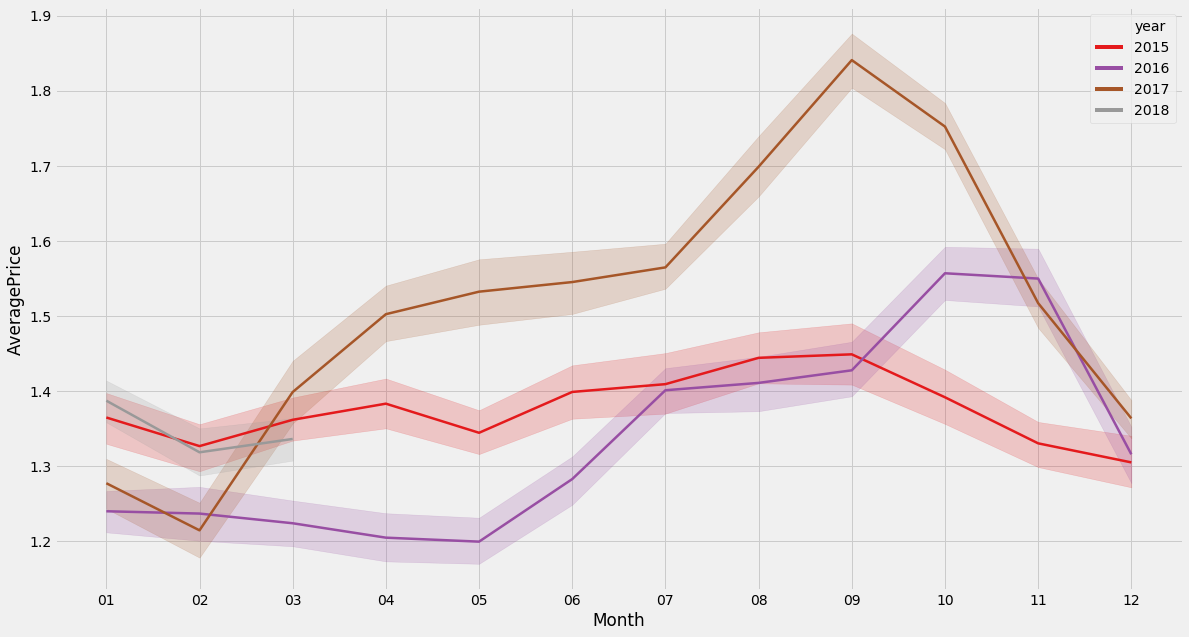

In [161]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='year',linewidth=2.5,  data=data_1,palette="Set1")
plt.show()

Conclusions:
    
1 - Our goal was to predict the price as dependence on time.

2 - The defined partition to the 5 regions managed to capture the differences between the various regions.

3 - Prophet model: showed average performance on the general. Showed good performance for states like Illinois and Texas and very poor 
    performance for the North region. Improvement can be made if we will specify the 'special occasions' for the model as periods between
    July/Aug - and October. 
    
4 - Though the relative simplicity , the Lasso regression model demonstrated good performance for all the regions.   